In [9]:
#!pip install --user ipykernel
#!python -m ipykernel install --user --name=ml

In [10]:
# Import Librariers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets, manifold

%matplotlib inline

## T-SNE visulaisation

In [12]:
# loading data
data = datasets.fetch_openml('mnist_784', version=1, return_X_y= True)
pixel_values, targets =  data
targets = targets.astype(int)

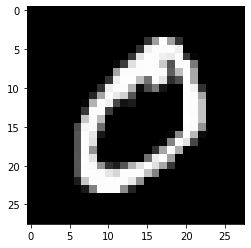

In [17]:
# Visulaisation
single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image,cmap='gray')

In [32]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000,:1])

In [33]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])),columns=["x","y", "targets"])
tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)

In [34]:
tsne_df

,x,y,targets
0,0.018035,-0.213124,5
1,0.018040,-0.213124,0
2,0.017949,-0.213428,4
3,0.018035,-0.213123,1
4,0.018035,-0.212988,9
...,...,...,...
2995,-0.898927,0.672060,7
2996,1.715640,-0.462133,0
2997,-1.723508,-0.012276,9
2998,-0.512436,0.141519,1


C:\Users\kaharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


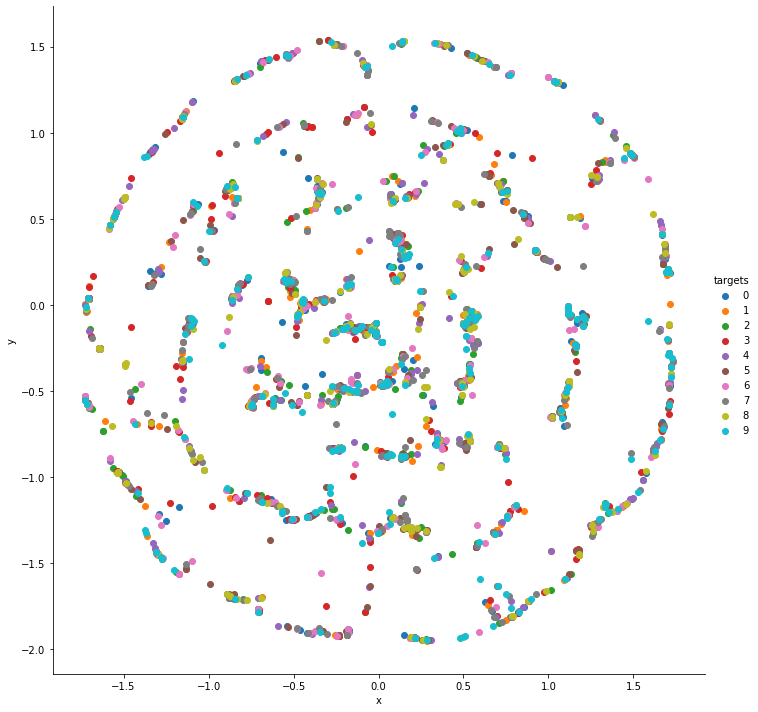

In [35]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=10)
grid.map(plt.scatter, "x", "y").add_legend()

In [41]:
import pandas as pd
df = pd.read_csv("datasets/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
# Get the unique values of quality column 
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [43]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
 3: 0,
 4: 1,
 5: 2,
 6: 3,
 7: 4,
 8: 5
}
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [46]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after 
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected
# for training
df_train = df.head(1000)

# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)